# Проект 4. Компьютер говорит "НЕТ".
## Ответы на задачи в проекте

In [1]:
import pandas as pd
import numpy as np


from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
train = pd.read_csv('./datasets/train.csv')
train

client_id education sex  age car car_type  decline_app_cnt  good_work  \
0          25905       SCH   M   62   Y        Y                0          0   
1          63161       SCH   F   59   N        N                0          0   
2          25887       SCH   M   25   Y        N                2          0   
3          16222       SCH   F   53   N        N                0          0   
4         101655       GRD   M   48   N        N                0          1   
...          ...       ...  ..  ...  ..      ...              ...        ...   
73794      54887       GRD   F   45   N        N                0          0   
73795      76821       SCH   M   41   Y        Y                0          0   
73796     103695       SCH   M   31   N        N                0          0   
73797        861       SCH   F   29   N        N                0          1   
73798      15796       GRD   M   34   N        N                0          0   

       bki_request_cnt  home_address  work_address  income foreign_passport  \
0                    1             1             2   18000                N   
1                    3             2             3   19000                N   
2                    1             1             2   30000                Y   
3                    2             2             3   10000                N   
4                    1             2             3   30000                Y   
...                ...           ...           ...     ...              ...   
73794                3             1             2   17000                N   
73795                1             2             2   70000                N   
73796                4             2             3   45000                N   
73797                3             1             3   13000                N   
73798                2             2             3   25000                N   

       default  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
73794        0  
73795        0  
73796        0  
73797        1  
73798        0  

[73799 rows x 14 columns]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB



Посмотрим на данные:

- client_id	идентификатор клиента
- education	уровень образования
- sex	пол заёмщика
- age	возраст заёмщика
- car	флаг наличия автомобиля
- car_type	флаг автомобиля-иномарки
- decline_app_cnt	количество отказанных прошлых заявок
- good_work	флаг наличия «хорошей» работы
- bki_request_cnt	количество запросов в БКИ
- home_address	категоризатор домашнего адреса
- work_address	категоризатор рабочего адреса
- income	доход заёмщика
- foreign_passport	наличие загранпаспорта
- default	наличие дефолта

<AxesSubplot:>

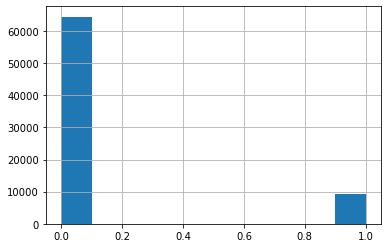

In [4]:
train['default'].hist()

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [6]:
train.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

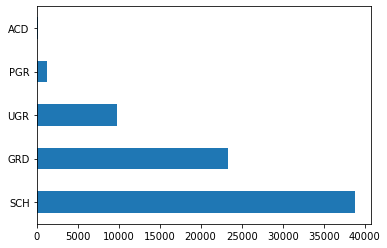

In [7]:
train['education'].value_counts().plot.barh()

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

In [10]:
train['income'].value_counts()
train['bki_request_cnt'].value_counts()
train['home_address'].value_counts()

2    39777
1    32462
3     1253
Name: home_address, dtype: int64

In [11]:
# формируем переменные списки с различными по типам колонками данных

bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

https://lms.skillfactory.ru/assets/courseware/v1/59694217c40479cc0a6d9f4c7b0c3c3e/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/dst-score-13.png




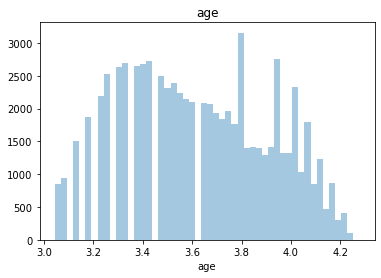

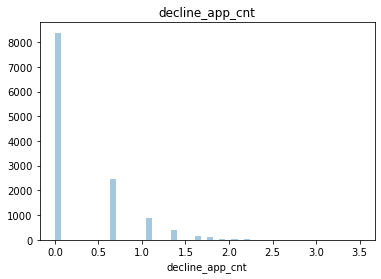

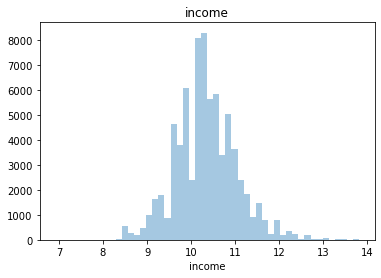

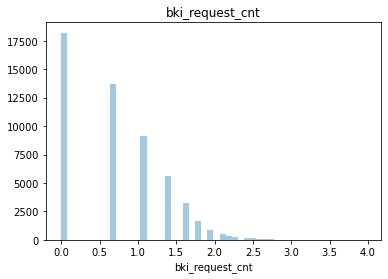

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for i in num_cols:
    plt.figure()
    # делаем с логарифмированием значений 
    sns.distplot(np.log(train[i][train[i] > 0].dropna()), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [15]:
sns.set_theme(style="ticks", palette="pastel")

ax = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=num_cols, width=0.5)
ax.set_ylim(0,100)

ValueError: could not convert string to float: 'age'

(0.0, 1000000.0)

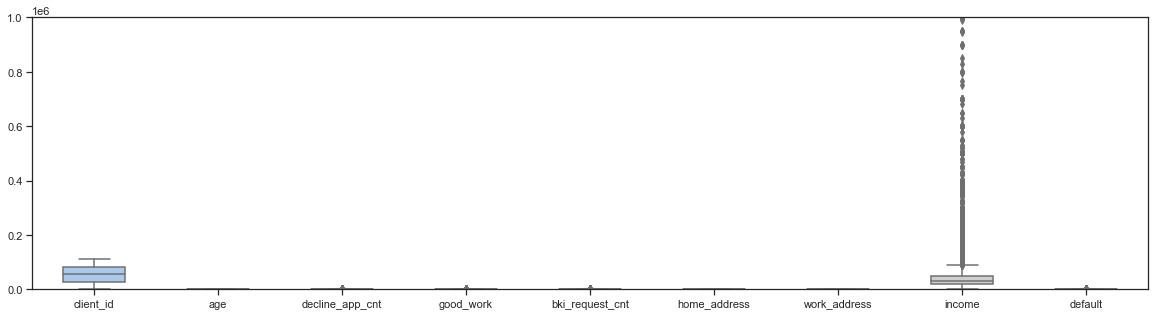

In [86]:
sns.set_theme(style="ticks", palette="pastel")

ax = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=num_train, width=0.5)
ax.set_ylim(0,1000000)

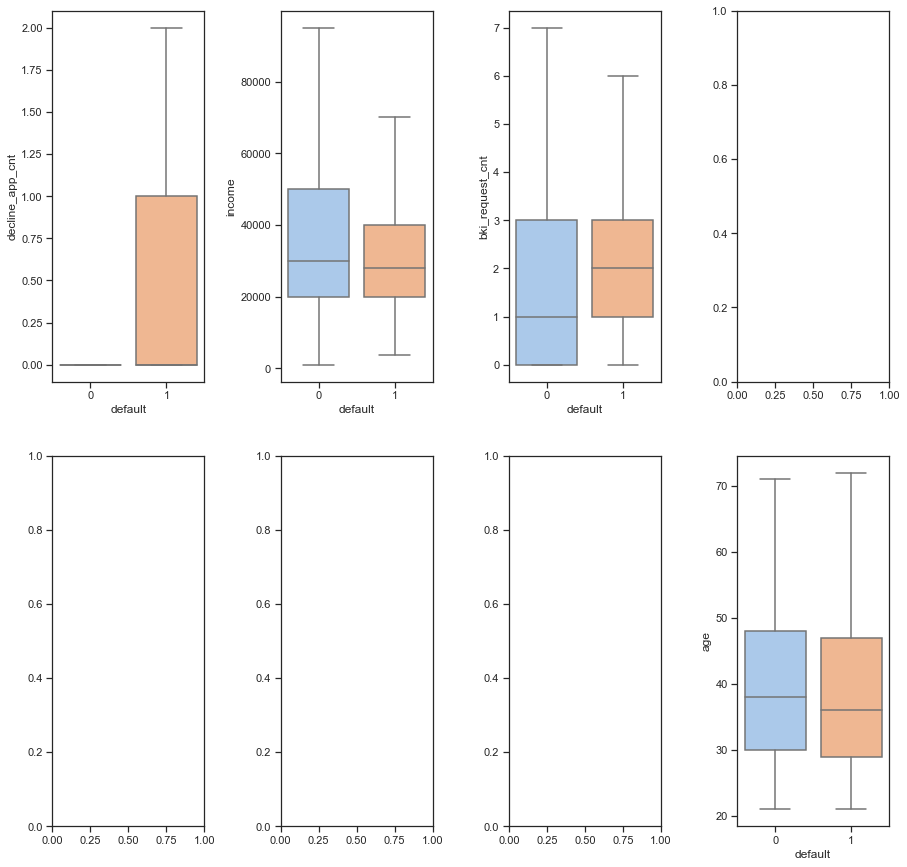

In [87]:

# визуализация числовых переменных с использованием boxplot
# честно взято из подсказки к задаче

fig, axes = plt.subplots(2, 4, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5)
axes = axes.flatten()

for i in range(len(num_cols)):
    sns.boxplot(
        x='default', 
        y=num_cols[i], 
        data=train, 
        orient = 'v', 
        ax=axes[i-1], 
        showfliers=False
    )



# 6. Оценка корреляций

$$
r_{xy} =\frac{\sum(x_i-\overline{x}) \times (y_i - \overline{y})} {\sqrt[]{ \sum (x_i - \overline{x})^2 \times \sum (y_i - \overline{y})^2 }}
$$




<AxesSubplot:>

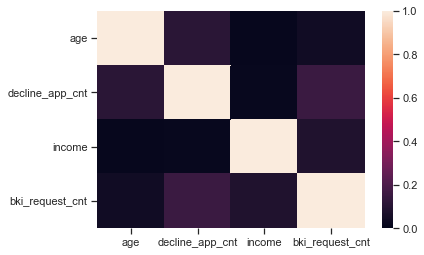

In [88]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)


# 7. Значимость непрерывных переменных

<AxesSubplot:>

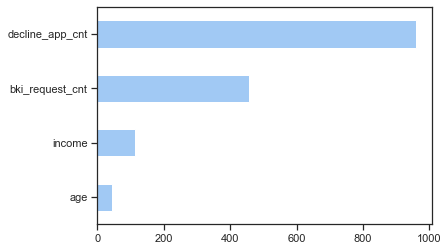

In [109]:

imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

# 8. Категориальные переменные

In [110]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 0, 1: 1}


In [111]:

# Для бинарных признаков мы будем использовать LabelEncoder
label_encoder = LabelEncoder()
display(bin_cols)

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
display( 
    train.head(), 


['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

client_id  education  sex  age  car  car_type  decline_app_cnt  good_work  \
0      25905          3    1   62    1         1                0          0   
1      63161          3    0   59    0         0                0          0   
2      25887          3    1   25    1         0                2          0   
3      16222          3    0   53    0         0                0          0   
4     101655          1    1   48    0         0                0          1   

   bki_request_cnt  home_address  work_address  income  foreign_passport  \
0                1             1             2   18000                 0   
1                3             2             3   19000                 0   
2                1             1             2   30000                 1   
3                2             2             3   10000                 0   
4                1             2             3   30000                 1   

   default  
0        0  
1        0  
2        0  
3        0  
4        0

## ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [112]:
print(train['education'].value_counts())

3    38860
1    23365
4     9816
2     1257
0      194
Name: education, dtype: int64


In [113]:

# education превращаем в числовые значения 
label_encoder = LabelEncoder()
# label_encoder.fit_transform(train['education'])
train['education'] = label_encoder.fit_transform(train['education'])

train['education'].value_counts()


3    38860
1    23365
4     9816
2     1257
0      194
Name: education, dtype: int64

<AxesSubplot:>

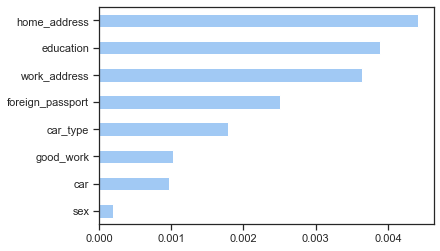

In [114]:
# определяем значимость категориальных и бинарных переменных
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')